# Iris Species Classification with K-means (Clustering)

## 1. Introduction

The Iris dataset was presented in 1936 in the work of R. Fisher called "The Use of Multiple Measurements in Taxonomic Problems". It can be downloaded from the UCI Machine Learning repository (link: <a href='https://archive.ics.uci.edu/ml/datasets/Iris'>click here</a>) where you can find , plus details about the dataset. <br>


<img src="iris01.png" alt="Variedades de Iris">

The dataset have 150 lines with 5 columns: 'sepal.lenght', 'sepal.width', petal.lenght', 'petal.width', 'variety'.

<img src="iris02.png" alt="Variedades de Iris">

Images obtained from the site: "aprendaia.com". Link:  <a href="https://aprendeia.com/machine-learning-clasificador-flor-iris-python/">click here </a>

In this work we try to achieve the classification of Iris varieties (5th column) from the data presented in the first 4 columns. 

## 2. Exploratory Data Analysis

### 2.1. The Dataset

In [1]:
# Libraries
import sklearn
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
# The Dataset from sklearn
df = pd.read_csv('iris.csv')
print(df)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [2]:
# Size of the Dataset:
df.shape

(150, 5)

In [3]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2.2. Univariate Analysis

#### Histogram of each variable

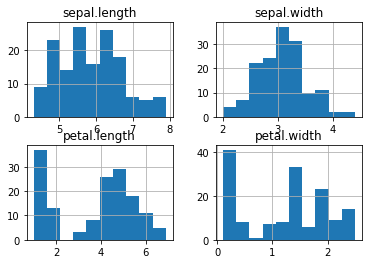

In [4]:
df.hist()
plt.show()

#### Boxplot Diagrams

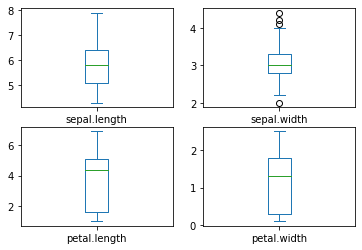

In [5]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

## 3. Clustering models with k-means

To visualize the grouping, the results that arise from the application of k-means to pairs of variables are presented in order to obtain graphs that are easy to interpret.<br>
To test and display the different combinations, we first present all possible pairs of combinations (in id_variable) in a list. Then the value of an iterator that points to an id_combinacion) can be varied in order to display the results for this combination.

In [6]:
# iterator: change the value of i from 0 to 5 and execute!
i=3 
# combinations:
combis=[[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
var1=combis[i][0] # Variable 1: x
var2=combis[i][1] # Variable 2: y
# Names of the variables:
fields=df.columns.tolist() 
print('Variables to analyze: ',fields[var1],' vs ',fields[var2])
# The data
x = df.iloc[:, [var1,var2]].values

Variables to analyze:  sepal.width  vs  petal.length


<AxesSubplot:xlabel='sepal.width', ylabel='petal.length'>

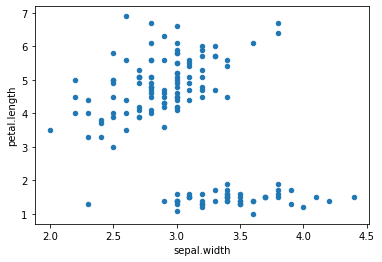

In [7]:
# Scatter (Scatter Graph)
df.plot(var1, var2,kind="scatter")


### 3.1. Quantity of Groups: The Elbow Curve

K-means is a highly efficient clustering algorithm. However, k-means requires that you indicate the number of clusters into which you want to group the data. <br>
For this there is a method called "The curve of the elbow": The corresponding curve (a polygonal) is drawn, and it is sought for which value the slope of the curve is 1, and it is selected.

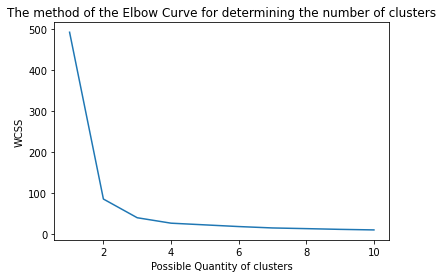

In [9]:
# THE ELBOW CURVE
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss_norm=[]
for i in range(len(wcss)):
    wcss_norm.append(float(wcss[i]/wcss[0]))
number_of_clusters=1
for i in range(len(wcss_norm)):
    if(wcss_norm[i]<0.5):
        number_of_clusters=i+1
        break
    else:
        pass
# Showing the Elbow Curve
plt.plot(range(1, 11), wcss)
plt.title('The method of the Elbow Curve for determining the number of clusters')
plt.xlabel('Possible Quantity of clusters')
plt.ylabel('WCSS') # within cluster: sum of squares
plt.show()

In [1]:
print('What do you think? Which one is the best value of "k" (quantity of clusters)? 2 or 3?')

What do you think? Which one is the best value of "k" (quantity of clusters)? 2 or 3?


### 3.2. Clustering

Obtained the value of K, the dataset is divided into k clusters.

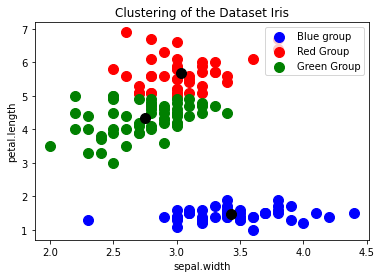

In [11]:
# CLUSTERING RELATED WITH THE RESULTS OF THE ELBOW CURVE
nb_of_clusters=3
kmeans = KMeans(n_clusters = nb_of_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
fig=plt.figure(figsize=(6, 4))
plt.title('Clustering of the Dataset Iris') # title of the graph
plt.xlabel(fields[var1]) # label x axis
plt.ylabel(fields[var2]) # label y axis
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Blue group')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Red Group')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Green Group')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = None)
plt.legend(loc='upper right') 
plt.show()

But... what does this grouping mean? What relationship does it have with the species of Iris? 

## 4. Testing the clustering

The evaluation of these clusters will be carried out graphically: superposing each cluster with each one of the (labeled) varieties.

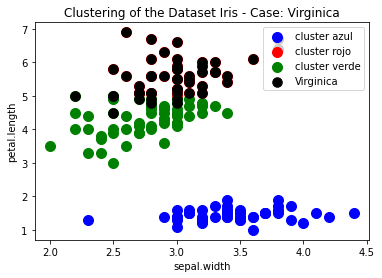

In [13]:
# SUPERPOSING CLUSTERS WITH LABELED CASES
# Cases: Coment out to disable variety
variety='Virginica'
#variety='Versicolor'
#variety='Setosa'
varieties=list(df.iloc[:,4])
df2=pd.DataFrame()
xc1=[]
xc2=[]
for i in range (len(varieties)):
    if(varieties[i]==variety):
        xc1.append(df.iloc[i,var1])
        xc2.append(df.iloc[i,var2])
    else:
        pass
df2[fields[var1]]=xc1
df2[fields[var2]]=xc2
xc = df2.iloc[:, [0,1]].values
# Graphs
fig=plt.figure(figsize=(6, 4))
plt.title('Clustering of the Dataset Iris - Case: '+str(variety)) # title of the graph
plt.xlabel(fields[var1]) # label x axis
plt.ylabel(fields[var2]) # label y axis
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'blue cluster')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'red cluster')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'green cluster')
plt.scatter(xc[:, 0], xc[:,1], s = 90, c = 'black', label = variety)
plt.legend(loc='upper right') 
plt.show()